In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
BATCH_SIZE = 693
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=20

In [ ]:
dataset = tf.keras.utils.image_dataset_from_directory(
    directory = "/content/drive/MyDrive/trainingData" ,
    shuffle=True,
    labels='inferred',
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 602 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['00_healthy', '01_angular_leaf_spot', '02_bean_rust']

In [ ]:
len(dataset)

5

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(602, 256, 256, 3)
[1 0 1 1 2 0 2 0 0 1 2 1 0 1 2 1 1 2 2 2 1 0 2 0 2 2 1 2 0 1 1 1 2 1 1 2 0
 1 0 0 1 1 2 1 1 1 2 1 1 1 2 0 2 2 2 2 0 2 1 2 0 0 2 1 0 0 1 1 2 1 2 1 1 0
 2 1 2 1 1 0 2 2 1 1 1 1 0 0 0 0 2 0 0 2 2 2 1 0 0 1 0 0 0 0 1 1 0 0 1 2 2
 0 2 2 2 1 1 0 0 1 2 1 2 0 1 1 1 1 0 0 2 2 2 1 0 0 0 0 0 1 1 0 2 2 0 1 1 2
 1 1 0 0 1 2 1 2 1 2 1 1 2 0 2 0 2 2 2 1 2 1 2 1 1 2 1 2 0 0 1 2 1 0 2 0 2
 2 1 0 2 2 2 2 0 2 2 1 0 2 2 0 1 0 1 2 1 1 0 2 1 0 0 1 0 1 2 2 0 1 0 0 2 0
 0 0 2 0 1 0 0 2 2 0 0 1 2 2 1 1 1 2 0 2 1 1 1 1 1 0 0 1 0 0 0 0 1 2 2 2 1
 2 0 2 0 1 1 1 0 1 1 0 1 2 1 0 0 1 1 1 0 0 1 2 1 1 0 0 1 2 2 1 1 0 2 1 2 0
 2 1 0 0 1 2 2 1 0 0 2 0 2 2 2 1 1 2 1 2 2 2 0 1 2 1 2 0 1 0 0 1 2 1 2 1 0
 0 2 2 1 1 1 1 1 1 2 1 0 0 1 1 2 2 0 1 0 0 0 0 2 1 2 2 1 1 0 2 1 1 0 2 0 1
 0 0 2 2 1 2 0 2 2 2 0 0 0 0 0 2 2 1 1 2 1 2 2 0 2 2 2 0 0 0 0 0 2 0 2 0 0
 2 2 0 1 2 2 0 0 1 0 1 2 1 0 1 0 1 0 2 2 2 1 0 1 0 0 2 0 2 0 0 2 0 2 0 0 1
 0 0 1 1 1 1 0 2 0 1 2 1 0 0 2 1 2 2 2 1 2 1 2 1 1 2 1 2 1 1 0 2 0 0 1 2 2
 2 1 2

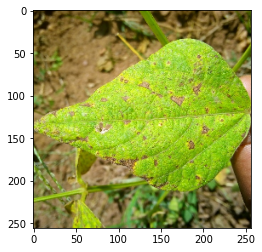

In [ ]:
plt.imshow(image_batch[4].numpy().astype("uint8"))

Text(0.5, 1.0, '01_angular_leaf_spot')

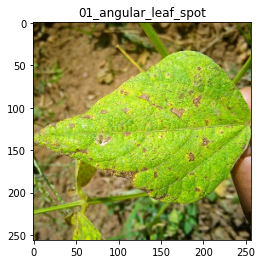

In [ ]:
plt.imshow(image_batch[4].numpy().astype("uint8"))
plt.title(class_names[labels_batch[4]])

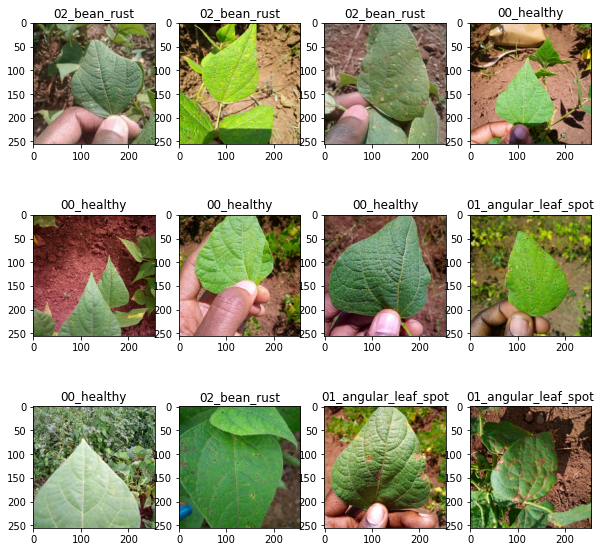

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range (12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])

In [ ]:
train_size = 0.9
len(dataset) * train_size

4.5

In [ ]:
train_ds = dataset.take(17)
len(train_ds)

5

In [ ]:
val_size = 0.1
val_ds = len(dataset)*val_size
val_ds

0.5

In [ ]:
val_ds=dataset.take(2)
len(val_ds)

2

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = "/content/drive/MyDrive/testData" ,
    shuffle=True,
    labels='inferred',
    label_mode = None,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 693 files belonging to 1 classes.


In [ ]:
for image_batch in test_ds:
    print(image_batch.shape)

(693, 256, 256, 3)


In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])


In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
batch_input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=batch_input_shape)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
)

Epoch 1/20
5/5 [==============================] - 90s 16s/step - loss: 1.1022 - accuracy: 0.3023 - val_loss: 1.0955 - val_accuracy: 0.4531
Epoch 2/20
5/5 [==============================] - 79s 16s/step - loss: 1.0922 - accuracy: 0.4286 - val_loss: 1.0778 - val_accuracy: 0.4297
Epoch 3/20
5/5 [==============================] - 83s 16s/step - loss: 1.0440 - accuracy: 0.4817 - val_loss: 0.9766 - val_accuracy: 0.5000
Epoch 4/20
5/5 [==============================] - 79s 16s/step - loss: 0.9906 - accuracy: 0.4834 - val_loss: 0.9558 - val_accuracy: 0.4453
Epoch 5/20
5/5 [==============================] - 79s 16s/step - loss: 0.9428 - accuracy: 0.5382 - val_loss: 0.9431 - val_accuracy: 0.5469
Epoch 6/20
5/5 [==============================] - 79s 16s/step - loss: 0.9077 - accuracy: 0.5897 - val_loss: 0.8199 - val_accuracy: 0.6523
Epoch 7/20
5/5 [==============================] - 99s 20s/step - loss: 0.8465 - accuracy: 0.6130 - val_loss: 0.8211 - val_accuracy: 0.6367
Epoch 8/20
5/5 [===========

In [ ]:
for image_batch in test_ds.take(1):
    print(image_batch.shape)


(128, 256, 256, 3)


Text(0.5, 1.0, '02_bean_rust')

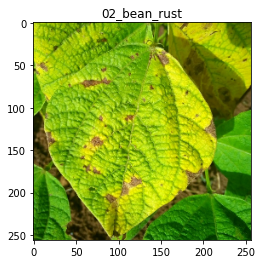

In [ ]:
plt.imshow(image_batch[1].numpy().astype("uint8"))
plt.title(class_names[labels_batch[1]])

In [ ]:
batch_prediction = model.predict(image_batch)

4/4 [==============================] - 4s 993ms/step


In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

first image to predict
22/22 [==============================] - 19s 865ms/step
predicted label: 02_bean_rust


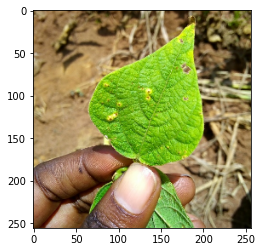

In [ ]:
import numpy as np
for image_batch in test_ds.take(1):
    
    first_image = image_batch[1].numpy().astype('uint8')
    
    print("first image to predict")
    plt.imshow(first_image)
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[1])])

1/1 [==============================] - 0s 57ms/step


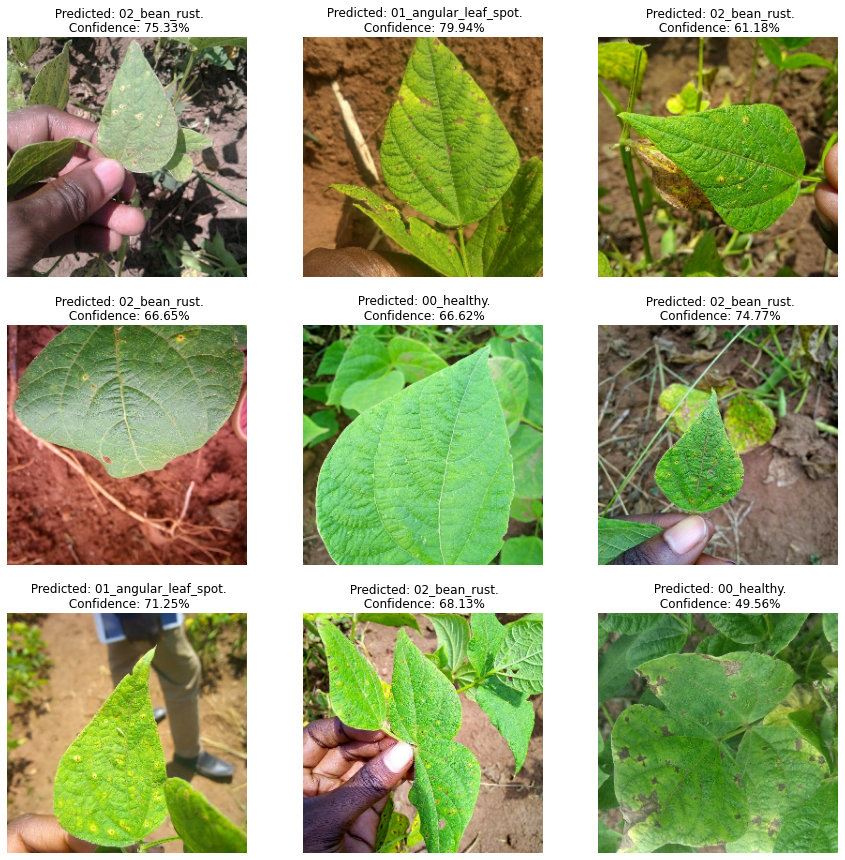

In [ ]:
plt.figure(figsize=(15, 15))
for images in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        
        plt.title(f" Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

1/1 [==============================] - 0s 57ms/step


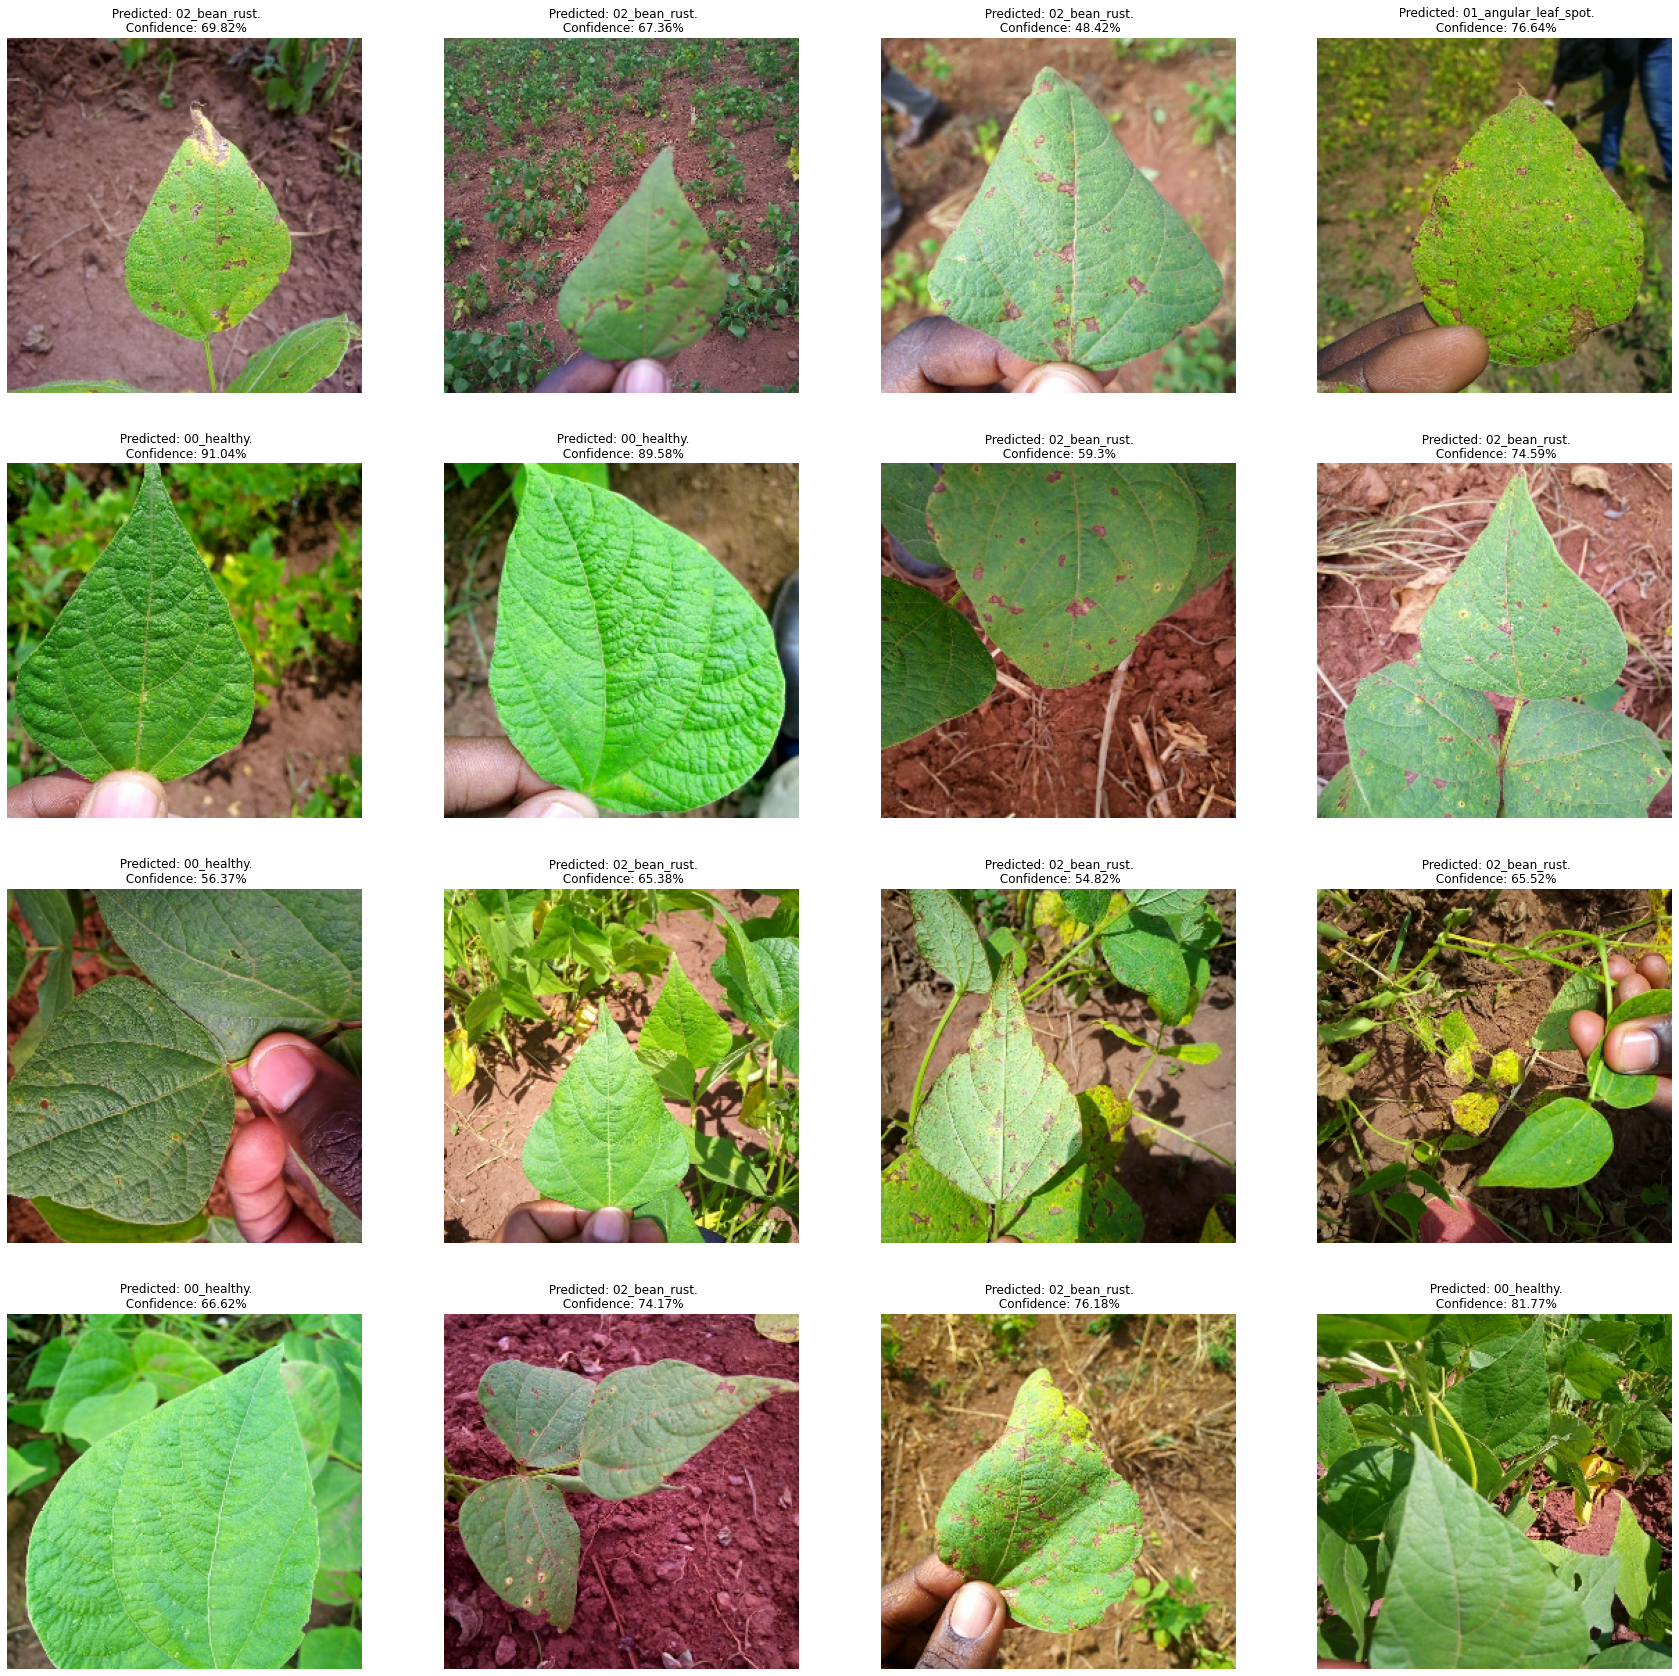

In [ ]:
plt.figure(figsize=(30, 30))
for images in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        
        plt.title(f" Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
import os
model.save("CNN.h5")

In [ ]:

import pandas as pd


for images in test_ds:
   for i in range(693):
     predicted_class, confidence = predict(model, images[i].numpy())
     name = ['file name', 'predicted result', 'confidence']
     result = pd.DataFrame(columns = name, data = [predicted_class, confidence])
     
     result.to_csv('/content/drive/MyDrive/result.csv', encoding = 'gbk')

        

1/1 [==============================] - 0s 49ms/step


ValueError: ignored